Activity 2.1
In the project_training dataset, we have some 3 dimensional data.

Perform a train, test split and test a k nearest neighbours model for 4 different values of  𝑘 , recording metrics for each one. Which value of  𝑘  gave the best metrics? Did this correlate with the best model? Why?

Use a Support Vector Machine to build a classifier for the same data and compare performance with the kNN model. Which is better?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Import some dummy data I've generated ahead of time.
df = pd.read_csv("project_training.csv")

print(df.head())


   class      x data      y data     z data
0      0   80.543502   41.318858  33.818395
1      0   78.291164  127.006373  41.923430
2      0  121.484717  120.776238  74.294293
3      0   22.123624   70.748242 -17.645028
4      0   63.964959  113.604554  98.920726


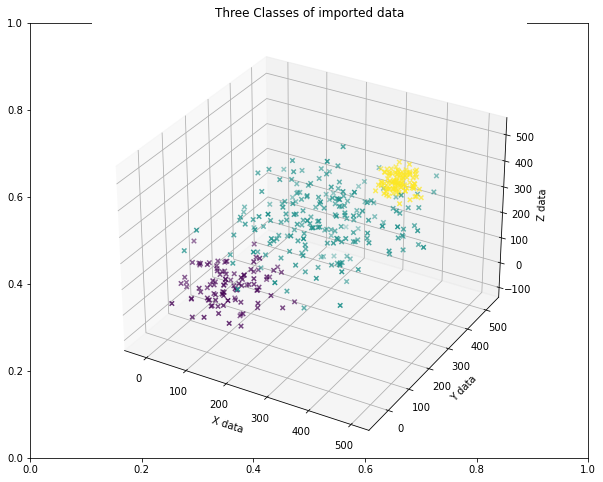

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(10,8))
#fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x data'], df['y data'],df['z data'], marker="x", c=df["class"])
ax.set_title("Three Classes of imported data")
ax.set_xlabel("X data")

ax.set_ylabel("Y data")

ax.set_zlabel("Z data")

plt.show()

In [4]:
# Import data.
df2 = pd.read_csv("project_training_test.csv")

print(df2.head())

   class      x data      y data      z data
0      0  125.600982  105.213082  -63.432438
1      0  135.775642   85.033342   83.818069
2      0  112.863681   56.872460   47.200589
3      0  137.332625  160.983579  132.215610
4      0  226.580433  117.215697    8.215858


In [5]:
# Here I am seperating the actual x, y data and the classes into two seperate
# objects. This is more to do with the scikitlearn method of doing things than
# anything!

data = df.drop('class', axis=1).values
classes = df['class'].values

# Unpack the train test splitted data. Test size = 0.2 = 20% of data is testing.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size=0.2)
#Its interesting to print these seperately to fully understand what you are dealing with
#print(x_train)
#print(y_train)
# Here we choose k=5. Investigation into different k in a moment!

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)



KNeighborsClassifier()

There might be a bit of confusion with notation here - remember that the scikitlearn train_test_split function takes in 2 compulsory arguments - the points and the labels. Your points will be in (x, y, z) format, and the labels in one long array, one for each (x, y, z) point. You pass the array of all the points as the first argument into train_test_split, and the array of labels into the second argument - I think what might be happening is you trying to split the x, y, z coordinates into x for points, y for labels, leaving you with a z hanging around. In a lot of documentation they use X for all points and Y for all labels, so in our case X would be made up of (x, y, z) points... confusing!

In [6]:
from sklearn.metrics import f1_score
for k in [1,3,5,10,15,20]:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Predict
    y_predict = knn.predict(x_test)
    print('F1 Score for k = ', k,"   ", f1_score(y_test, y_predict,average="macro"))

    
    

F1 Score for k =  1     0.9407407407407408
F1 Score for k =  3     0.9407407407407408
F1 Score for k =  5     0.9521531100478469
F1 Score for k =  10     0.9521531100478469
F1 Score for k =  15     0.9516296784589467
F1 Score for k =  20     0.9516296784589467


k = 3 gave us the best result, as we also could support this visually with three clusters in plot above
I spent an enormous amount of time trying to get the boundary sections plot to work, but in the end I had to give up
I would need to understand in more detail the dividing up of the grid mesh and relating x, y and z
So move onto SVM

In [13]:
#Now try to use SVM
from sklearn import svm
from sklearn.metrics import f1_score

model = svm.LinearSVC(max_iter=1000)
model.fit(x_train, y_train)


y_predict = model.predict(x_test)

# We won't always have the luxury of printing this, but let's try
#print('Test values', y_test,'\n')
#print('Predicted values', y_predict)

# We can see some differences. Let's get the F1 score.
print(f1_score(y_test, y_predict, average="macro"))

0.3227119164619165


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
#So thats a really low score, but now advised about number of iterations

In [14]:
#Lets look at different max iterations
#Its massively senstative, you get a thought that there is a hump around 300000
for i in range(290000,305000,1000):
    # Build and fit model
    model = svm.LinearSVC(max_iter=i)
    model.fit(x_train, y_train)

    y_predict = model.predict(x_test)

    # We can see some differences. Let's get the F1 score.
    p = f1_score(y_test, y_predict, average="macro")
    if p > 0.75:
        print('F1 Score detail:',"Iters",i,"p value",p)
        # We won't always have the luxury of printing this, but let's try
        print('Test values', y_test,'\n')
        print('Predicted values', y_predict)
print('F1 Score:', f1_score(y_test, y_predict, average="macro"))

C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score detail: Iters 290000 p value 0.8547378547378547
Test values [1 0 1 0 1 2 1 1 0 1 1 0 0 1 1 1 0 1 2 2 2 0 2 1 1 2 2 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 1 1 0 1 2 1 0 0 2 0 2 0 1 1 2 1 1 2 2
 0 0 1 1 0 2] 

Predicted values [1 0 1 0 2 2 1 0 0 0 1 0 0 0 1 1 0 1 2 2 2 0 2 1 0 2 2 1 1 0 0 1 0 1 1 1 1
 2 2 1 0 2 2 1 2 1 2 2 0 1 0 0 2 2 1 0 1 0 1 2 2 0 0 2 0 2 0 0 1 2 1 1 2 2
 0 0 1 1 0 2]


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score detail: Iters 291000 p value 0.9026455026455027
Test values [1 0 1 0 1 2 1 1 0 1 1 0 0 1 1 1 0 1 2 2 2 0 2 1 1 2 2 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 1 1 0 1 2 1 0 0 2 0 2 0 1 1 2 1 1 2 2
 0 0 1 1 0 2] 

Predicted values [1 0 1 0 2 2 1 1 0 0 1 0 0 1 1 1 0 1 2 2 2 0 2 1 0 2 2 1 1 0 1 1 0 1 1 1 1
 2 2 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 2 1 0 1 2 2 0 0 2 0 2 0 0 1 2 1 1 2 2
 0 0 1 1 0 2]


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score detail: Iters 293000 p value 0.7543385170160017
Test values [1 0 1 0 1 2 1 1 0 1 1 0 0 1 1 1 0 1 2 2 2 0 2 1 1 2 2 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 1 1 0 1 2 1 0 0 2 0 2 0 1 1 2 1 1 2 2
 0 0 1 1 0 2] 

Predicted values [2 0 1 0 2 2 1 0 0 0 1 0 0 0 1 1 0 1 2 2 2 0 2 1 0 2 2 1 1 0 0 1 0 1 0 0 2
 2 2 1 0 2 2 1 2 2 2 2 0 1 0 0 2 2 1 0 2 0 1 2 2 0 0 2 0 2 0 0 2 2 1 2 2 2
 0 0 1 1 0 2]


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score detail: Iters 294000 p value 0.890499194847021
Test values [1 0 1 0 1 2 1 1 0 1 1 0 0 1 1 1 0 1 2 2 2 0 2 1 1 2 2 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 1 1 0 1 2 1 0 0 2 0 2 0 1 1 2 1 1 2 2
 0 0 1 1 0 2] 

Predicted values [1 0 1 0 2 2 1 1 0 0 1 0 0 1 1 1 0 1 2 2 2 0 2 1 0 2 2 1 1 0 0 1 0 1 1 1 1
 2 2 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 2 1 0 1 2 2 0 0 2 0 2 0 0 1 2 1 1 2 2
 0 0 1 1 0 2]


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score detail: Iters 296000 p value 0.9026455026455027
Test values [1 0 1 0 1 2 1 1 0 1 1 0 0 1 1 1 0 1 2 2 2 0 2 1 1 2 2 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 1 1 0 1 2 1 0 0 2 0 2 0 1 1 2 1 1 2 2
 0 0 1 1 0 2] 

Predicted values [1 0 1 0 2 2 1 1 0 0 1 0 0 1 1 1 0 1 2 2 2 0 2 1 0 2 2 1 1 0 1 1 0 1 1 1 1
 2 2 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 2 1 0 1 2 2 0 0 2 0 2 0 0 1 2 1 1 2 2
 0 0 1 1 0 2]


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score detail: Iters 298000 p value 0.8387484602118748
Test values [1 0 1 0 1 2 1 1 0 1 1 0 0 1 1 1 0 1 2 2 2 0 2 1 1 2 2 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 1 1 0 1 2 1 0 0 2 0 2 0 1 1 2 1 1 2 2
 0 0 1 1 0 2] 

Predicted values [1 0 1 0 2 2 1 1 0 0 1 0 0 1 1 1 0 1 2 1 2 0 2 1 0 2 1 1 1 0 1 1 0 1 1 1 1
 2 2 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 2 1 0 1 2 2 0 0 2 0 2 1 0 1 2 1 1 1 1
 0 0 1 1 0 2]


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score detail: Iters 300000 p value 0.8194953194953195
Test values [1 0 1 0 1 2 1 1 0 1 1 0 0 1 1 1 0 1 2 2 2 0 2 1 1 2 2 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 1 1 0 1 2 1 0 0 2 0 2 0 1 1 2 1 1 2 2
 0 0 1 1 0 2] 

Predicted values [1 0 1 0 2 2 1 0 0 0 1 0 0 0 1 1 0 1 2 2 2 0 2 1 0 2 2 1 1 0 0 1 0 1 0 0 1
 2 2 1 0 2 2 1 2 1 2 2 0 1 0 0 2 2 1 0 1 0 1 2 2 0 0 2 0 2 0 0 1 2 0 1 2 2
 0 0 1 1 0 2]


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score detail: Iters 302000 p value 0.8174603174603176
Test values [1 0 1 0 1 2 1 1 0 1 1 0 0 1 1 1 0 1 2 2 2 0 2 1 1 2 2 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 2 2 1 2 1 2 2 0 1 0 0 1 2 1 1 1 0 1 2 1 0 0 2 0 2 0 1 1 2 1 1 2 2
 0 0 1 1 0 2] 

Predicted values [1 0 1 0 2 2 1 0 0 0 1 0 0 0 1 1 0 1 2 2 2 0 2 1 0 2 2 1 1 0 0 1 0 1 1 1 1
 2 2 1 0 2 2 1 2 2 2 2 0 1 0 0 2 2 1 0 2 0 1 2 2 0 0 2 0 2 0 0 2 2 1 1 2 2
 0 0 1 1 0 2]


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score: 0.5441650548033526


C:\Users\decla\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


This last section looks untidy but this is about showing learning.
So the KNN accuracy of 0.95, the SVM stayed at around 0.90 at 300000 iterations. If you do not test with more iterations
then how would you know that you need to find a hump at some value of iterations
This initial study would suggest to me to use KNN, altough I could have made a mistake in my workings.
On the internet a review favoured SVM over KNN, but with the cavet of suiting your dataset.